In [32]:
import pandas as pd
from statistics import mean
import numpy as np

In [33]:
import json
from typing import List

In [34]:
path = "stats.json"

In [35]:
datas = pd.read_json(path, lines=True)

In [36]:
# metodo che calcola il numero di elementi diversi per ciascuna colonna e il numero di valori
# nulli totali del dataset
def calculateDifferentValueForColumnAndNumberOfNan(dataset, column2differentvalues, numberOfNan=0):
    # per ogni tabella del dataset
    for i in range(len(dataset)):
        columnsnames = list((dataset["columns2dataColumn"][i]))
        # per ogni colonna della tabella
        for e in range(len(columnsnames)):
            columnelems = list((dataset["columns2dataColumn"][i])[columnsnames[e]])
            columnmap = dict()
            # scorri la lista di elementi della colonna
            for l in range(len(columnelems)):
                # se il valore è nullo incrementa la variabille di nan
                if columnelems[l] == "Nan":
                    numberOfNan = numberOfNan + 1.0
                # aggiorna la mappa di termini della colonna
                columnmap.update({columnelems[l]: 1})
            # aggiorna la mappa colonna numero di elementi diversi
            table_column = dataset["id"][i] + columnsnames[e]
            column2differentvalues.update({table_column: len(columnmap.keys())})

In [37]:
totRows = len(datas)
avgRows = (datas["numRows"]).mean()
avgColumns = (datas["numColumns"]).mean()
nnan = 0
column2differentvalues = dict()
calculateDifferentValueForColumnAndNumberOfNan(datas, column2differentvalues, nnan)
avgNan = (nnan / len(datas))
#parsingtime
parsingtime = 156533921459  #ns
# indexingtime senza multithreading
indexingtimewithout = 0 
# indexingtime con multithreading
indexingtime = 75921362834   #ns
# searchingtime senza multithreading
searchingtimewithout = 181 #s
# searchingtime con 2 core
searchingtime2core = 101 #s
# searchingtime con 4 core
searchingtime2core = 65 #s
# searchingtime con 8 core
searchingtime2core = 52 #s
# searchingtime con multithreading con 9 core
searchingtime = 41 #s
# searchingtime con multithreading con 10 core
searchingtime10core = 36 #s

In [38]:
print("Numero totale di tabelle: ", totRows)
print("Numero medio di righe", avgRows)
print("Numero medio di colonne", avgColumns)
print("Numero medio di valori nulli", avgNan)
print("Tempo di parsing del file json", parsingtime)
print("indexingtime senza multithreading", indexingtime)
#print(column2differentvalues)

Numero totale di tabelle:  550271
Numero medio di righe 18.20436839302816
Numero medio di colonne 4.487583390729295
Numero medio di valori nulli 0.0
Tempo di parsing del file json 156533921459
indexingtime senza multithreading 75921362834


In [39]:
column2diff = pd.Series(column2differentvalues.values())

In [40]:
import matplotlib as plt
from matplotlib.pyplot import grid

print(column2diff[:])


0          13
1          10
2          12
3           8
4           3
           ..
2027075     4
2027076    30
2027077    20
2027078    38
2027079    38
Length: 2027080, dtype: int64


Plot della distribuzione del numero di righe

Text(0.5, 0, 'Number of rows')

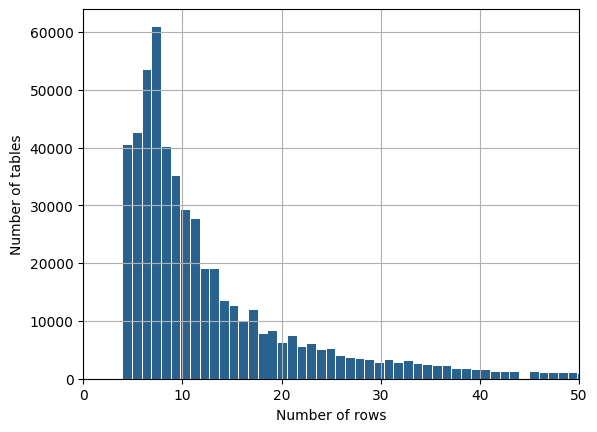

In [41]:
numrows_distr = datas["numRows"].plot.hist(bins=6250, grid=True, color='#2A628F', rwidth=0.9)
numrows_distr.set_xlim(0, 50)
numrows_distr.set_ylabel("Number of tables")
numrows_distr.set_xlabel("Number of rows")

Plot del numero di valori diversi per colonna

Text(0.5, 0, 'Number of columns')

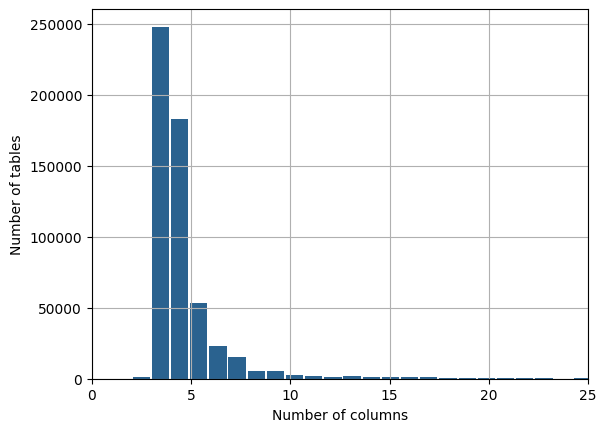

In [42]:
numcolumns_distr = datas["numColumns"].plot.hist(bins=30000, grid=True, color='#2A628F', rwidth=0.9)
numcolumns_distr.set_xlim(0, 25)
numcolumns_distr.set_ylabel("Number of tables")
numcolumns_distr.set_xlabel("Number of columns")

Text(0.5, 0, 'Number of different values')

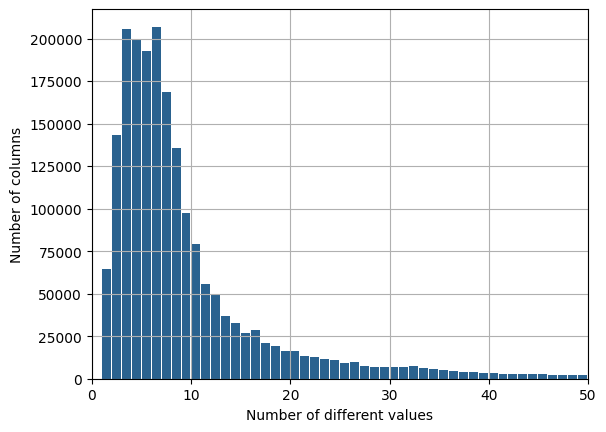

In [43]:
coldiff = column2diff.plot.hist(bins=6000, grid=True, color='#2A628F', rwidth=0.9)
coldiff.set_xlim(0, 50)
coldiff.set_ylabel("Number of columns")
coldiff.set_xlabel("Number of different values")

In [50]:
numrows2count = dict()
for row in datas["numRows"]:
    if numrows2count.get(row):
        numrows2count[row] = numrows2count.get(row) + 1
    else:
        numrows2count[row] = 1
print("\n")
numrows2countsorted = sorted(numrows2count.items(), key=lambda x:x[1], reverse=True)
slots = [0 for _ in range(6)] 
for rows, num in numrows2countsorted:
    if rows < 6:
        i=0
    if rows >= 6 and rows < 10:
        i=1
    if rows >= 10 and rows < 15:
        i = 2
    if rows >= 15 and rows < 20:
        i = 3
    if rows >= 20 and rows < 50:
        i = 4
    if rows >= 50:
        i = 5
        
    slots[i] += num 
print(slots)
print(numrows2countsorted)



[82976, 189420, 108269, 50504, 85516, 33586]
[(7, 60894), (6, 53420), (5, 42467), (4, 40509), (8, 40078), (9, 35028), (10, 29154), (11, 27696), (12, 19049), (13, 19008), (14, 13362), (15, 12607), (17, 11848), (16, 10072), (19, 8269), (18, 7708), (21, 7383), (20, 6126), (23, 5988), (22, 5499), (25, 5172), (24, 5018), (102, 4912), (26, 3987), (27, 3671), (28, 3341), (31, 3220), (29, 3177), (33, 3045), (32, 2784), (30, 2736), (34, 2600), (35, 2338), (37, 2144), (36, 2118), (38, 1728), (39, 1672), (41, 1558), (40, 1483), (42, 1248), (43, 1218), (44, 1210), (45, 1124), (51, 1049), (46, 1049), (47, 1023), (53, 961), (48, 946), (49, 910), (52, 847), (50, 830), (54, 791), (55, 728), (56, 650), (58, 611), (57, 582), (61, 568), (59, 559), (60, 527), (62, 497), (64, 484), (66, 455), (65, 443), (63, 439), (68, 424), (67, 391), (71, 383), (72, 382), (70, 381), (69, 372), (76, 342), (101, 328), (74, 310), (75, 305), (73, 296), (77, 271), (78, 269), (82, 265), (79, 264), (81, 261), (84, 247), (80, 

In [52]:
numcolumns2count = dict()
for column in datas["numColumns"]:
    if numcolumns2count.get(column):
        numcolumns2count[column] = numcolumns2count.get(column) + 1
    else:
        numcolumns2count[column] = 1


numcolumns2countsorted = sorted(numcolumns2count.items(), key=lambda x:x[1])
slots = [0 for _ in range(6)] 
for rows, num in numcolumns2countsorted:
    if rows < 6:
        i=0
    if rows >= 6 and rows < 10:
        i=1
    if rows >= 10 and rows < 15:
        i = 2
    if rows >= 15 and rows < 20:
        i = 3
    if rows >= 20 and rows < 50:
        i = 4
    if rows >= 50:
        i = 5
        
    slots[i] += num 
print(slots)
print(numcolumns2countsorted)


[485421, 48638, 8504, 3913, 2947, 848]
[(240, 1), (220, 1), (72, 1), (28999, 1), (86, 1), (45, 1), (650, 1), (76, 1), (204, 1), (200, 1), (43, 1), (81, 1), (560, 1), (103, 1), (113, 1), (111, 1), (300, 1), (121, 1), (73, 1), (910, 1), (660, 1), (360, 1), (141, 1), (390, 1), (110, 1), (513, 1), (143, 1), (127, 1), (102, 1), (47, 1), (163, 1), (291, 1), (115, 1), (98, 1), (48, 1), (78, 1), (49, 1), (101, 1), (120, 2), (70, 2), (39, 2), (520, 2), (59, 2), (93, 2), (74, 2), (80, 2), (138, 2), (58, 2), (420, 2), (440, 2), (140, 2), (590, 2), (77, 2), (83, 2), (41, 3), (61, 3), (87, 3), (1000, 3), (64, 4), (62, 4), (54, 4), (97, 4), (66, 5), (51, 5), (65, 5), (164, 5), (63, 6), (67, 6), (44, 7), (137, 7), (52, 9), (55, 9), (56, 9), (40, 12), (71, 14), (400, 16), (104, 16), (68, 18), (60, 19), (53, 19), (57, 21), (42, 23), (37, 23), (105, 26), (600, 30), (33, 31), (32, 33), (500, 34), (99, 36), (35, 38), (36, 42), (28, 48), (26, 53), (29, 55), (46, 62), (24, 69), (30, 76), (31, 94), (34, 103)